In [178]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

recipes_df = pd.read_csv(os.path.join('Resources','RAW_recipes.csv'))
recipes_df.rename(columns = {'id':'recipe_id'}, inplace=True)
recipes_df.drop(['contributor_id'], axis = 1, inplace = True)

metadata_df = pd.read_csv(os.path.join('Resources','RAW_interactions.csv'), parse_dates = ['date'])

merged_df = pd.merge(metadata_df, recipes_df[['recipe_id', 'name', 'minutes']], on = 'recipe_id')

# Dropping crazy looking time-to-prepare recipes
drop_indices = merged_df.loc[(merged_df['recipe_id'] == 261647) | (merged_df['recipe_id'] == 447963)].index
merged_df.drop(drop_indices, inplace = True);

In [179]:
merged_df.head()

,user_id,recipe_id,date,rating,review,name,minutes
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10


In [180]:
group_of_recipes = merged_df.groupby(['recipe_id', 'name'])

## 1. Is there a trend of high reviewed recipes vs. time-to-prepare?

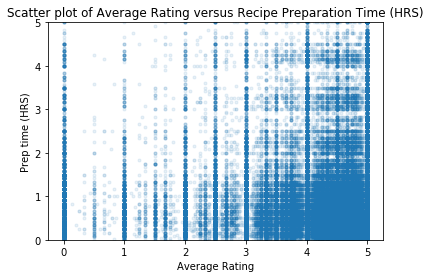

In [197]:
y_values = group_of_recipes['minutes'].mean()/60
x_values = group_of_recipes['rating'].mean()
plt.scatter(x_values,y_values, alpha = 0.1, marker = '.')
plt.ylim([0,5]);
plt.xlabel('Average Rating')
plt.ylabel('Prep time (HRS)')
# plt.ylabel('Average Tumor Volume (mm^3)');
plt.title('Scatter plot of Average Rating versus Recipe Preparation Time (HRS)');

**Observation**: Understandably, a high number of average 4 - 5 star rated dishes lie in the range of 0 to 1.5 hours preparation time.

## 2. What is the breakdown of recipes in each preparation time bucket?